In [2]:
import cv2
import cv2.aruco as aruco
import numpy as np

## camera calibration

In [3]:
camera_matrix = np.array([[1400, 0, 960],
                          [0, 1400, 540],
                          [0, 0, 1]], dtype="double")
dist_coeffs = np.zeros((4, 1))  # Assuming no distortion

In [56]:
import cv2
import numpy as np

def track_aruco_marker(video_path, marker_size=7):
    cap = cv2.VideoCapture(video_path)

    # Load the ArUco dictionary and parameters
    aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_7X7_250)
    parameters = cv2.aruco.DetectorParameters_create()

    # Create a video writer to save the output video
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (frame_width, frame_height))

    # Lists to store the marker positions for plotting trajectory
    trajectory = []
    times = []

    # Flag to check if the reference point is set
    reference_set = False
    reference_point = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to grayscale for marker detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect markers in the frame
        corners, ids, _ = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)

        if ids is not None:
            # Draw the detected markers
            aruco.drawDetectedMarkers(frame, corners, ids)

            # Estimate the pose of the marker
            rvecs, tvecs, _ = aruco.estimatePoseSingleMarkers(corners, marker_size, camera_matrix, dist_coeffs)

            # Draw the axes of the marker
            for i in range(len(ids)):
                cv2.drawFrameAxes(frame, camera_matrix, dist_coeffs, rvecs[i], tvecs[i], marker_size)

                # Save the marker position for trajectory plotting
                if not reference_set:
                    reference_point = tvecs[i][0]
                    reference_set = True

                trajectory.append(tvecs[i][0] - reference_point)

                times.append(cap.get(cv2.CAP_PROP_POS_MSEC))

        # Write the frame with markers drawn to the output video
        out.write(frame)

        # Display the frame with markers
        cv2.imshow('Frame', frame)

        # Break the loop when 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release video capture and writer objects
    cap.release()
    out.release()

    # Close all OpenCV windows
    cv2.destroyAllWindows()

    return np.array(trajectory), np.array(times)


In [5]:

def display_trajectory_on_frame(video_path, marker_trajectory, output_image_path, frame_in=10, scale_factor=1, x_offset=0, y_offset=0, color = (0, 0, 255)):
    cap = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Read the middle frame
    if frame_in == "mid":
        frame_index = total_frames // 2
    else:
        frame_index = frame_in


    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    ret, frame = cap.read()

    # Get the frame dimensions
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))

    # Create a blank image for drawing the trajectory
    trajectory_image = np.zeros_like(frame)

    counter = 0

    # Draw the trajectory on the blank image
    for point in marker_trajectory:
        counter += 1
        x, y, _ = map(float, point)

        # shift the points to the center of the image
        x += (frame_width + x_offset) // (2 * scale_factor)
        y += (frame_height + y_offset) // (2 * scale_factor)

        # Scale the points based on the specified factor
        x = int(x * scale_factor)
        y = int(y * scale_factor)

        # cv2.circle(trajectory_image, (x, y), 2, (0, 255, 0), -1)

        if counter > 10:
            # draw a line between points
            cv2.line(trajectory_image, (last_x, last_y), (x, y), color, 5)

        last_x, last_y = x, y

    # Overlay the trajectory image onto the middle frame
    result_frame = cv2.addWeighted(frame, 1, trajectory_image, 0.9, 0)

    # Save the result frame with the drawn trajectory
    cv2.imwrite(output_image_path, result_frame)

    # Display the result frame
    cv2.imshow('Trajectory on Middle Frame', result_frame)
    cv2.waitKey(0)

    # Release video capture object
    cap.release()

    # Close OpenCV windows
    cv2.destroyAllWindows()



In [6]:


def display_2_trajectories_on_frame(video_path, marker_trajectory_1, marker_trajectory_2, output_image_path, frame_in=10, scale_factor=1, x_offset=0, y_offset=0):
    cap = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Read the middle frame
    if frame_in == "mid":
        frame_index = total_frames // 2
    else:
        frame_index = frame_in


    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    ret, frame = cap.read()

    # Get the frame dimensions
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))

    # Create a blank image for drawing the trajectory
    trajectory_image = np.zeros_like(frame)

    counter = 0

    # Draw the trajectory on the blank image
    for point in marker_trajectory_1:
        counter += 1
        x, y, _ = map(float, point)

        # shift the points to the center of the image
        x += (frame_width + x_offset) // (2 * scale_factor)
        y += (frame_height + y_offset) // (2 * scale_factor)

        # Scale the points based on the specified factor
        x = int(x * scale_factor)
        y = int(y * scale_factor)

        # cv2.circle(trajectory_image, (x, y), 2, (0, 255, 0), -1)

        if counter > 10:
            # draw a line between points
            cv2.line(trajectory_image, (last_x, last_y), (x, y), (0,0,250), 5)

        last_x, last_y = x, y

    counter = 0

    # Draw the trajectory on the blank image
    for point in marker_trajectory_2:
        counter += 1
        x, y, _ = map(float, point)

        # shift the points to the center of the image
        x += (frame_width + x_offset) // (2 * scale_factor)
        y += (frame_height + y_offset) // (2 * scale_factor)

        # Scale the points based on the specified factor
        x = int(x * scale_factor)
        y = int(y * scale_factor)

        # cv2.circle(trajectory_image, (x, y), 2, (0, 255, 0), -1)

        if counter > 10:
            # draw a line between points
            cv2.line(trajectory_image, (last_x, last_y), (x, y), (0, 250, 0), 5)

        last_x, last_y = x, y
    # Overlay the trajectory image onto the middle frame
    result_frame = cv2.addWeighted(frame, 1, trajectory_image, 0.9, 0)

    # Save the result frame with the drawn trajectory
    cv2.imwrite(output_image_path, result_frame)

    # Display the result frame
    cv2.imshow('Trajectory on Middle Frame', result_frame)
    cv2.waitKey(0)

    # Release video capture object
    cap.release()

    # Close OpenCV windows
    cv2.destroyAllWindows()



## ANALYSIS

### Mimyo

In [7]:
# Replace 'path/to/your/video.mp4' with the path to your video file
video_path_mimyo = 'C:/Users/adrie/Desktop/PDS_Thymio/001_code/Python/Thymio_et_mouvement/Testing/Mimyo.mp4'

In [57]:
# Call the function to track ArUco marker trajectory
marker_trajectory_mimyo, times_mimyo = track_aruco_marker(video_path_mimyo)

In [59]:
print(np.shape(marker_trajectory_mimyo))
print(np.shape(times_mimyo))
print(times_mimyo)

(243, 3)
(243,)
[ 120.  160.  200.  240.  280.  320.  360.  400.  440.  480.  520.  560.
  600.  640.  680.  720.  760.  800.  840.  880.  920.  960. 1000. 1040.
 1080. 1120. 1160. 1200. 1240. 1280. 1320. 1360. 1400. 1440. 1480. 1520.
 1560. 1600. 1640. 1680. 1720. 1760. 1800. 1840. 1880. 1920. 1960. 2000.
 2040. 2080. 2120. 2160. 2200. 2240. 2280. 2320. 2360. 2400. 2440. 2480.
 2520. 2560. 2600. 2640. 2680. 2720. 2760. 2800. 2840. 2880. 2920. 2960.
 3000. 3040. 3080. 3120. 3160. 3200. 3240. 3280. 3320. 3360. 3400. 3440.
 3480. 3520. 3560. 3600. 3640. 3680. 3720. 3760. 3800. 3840. 3880. 3920.
 3960. 4000. 4040. 4080. 4120. 4160. 4200. 4240. 4280. 4320. 4360. 4400.
 4440. 4480. 4520. 4560. 4600. 4640. 4680. 4720. 4760. 4800. 4840. 4880.
 4920. 4960. 5000. 5040. 5080. 5120. 5160. 5200. 5240. 5280. 5320. 5360.
 5400. 5440. 5480. 5520. 5560. 5600. 5640. 5680. 5720. 5760. 5800. 5840.
 5880. 5920. 5960. 6000. 6040. 6080. 6120. 6160. 6200. 6240. 6280. 6320.
 6360. 6400. 6440. 6480. 6520. 6560

In [9]:
output_im_path = 'C:/Users/adrie/Desktop/PDS_Thymio/001_code/Python/Thymio_et_mouvement/Testing/Mimyo_trajectory.png'
# Call the function to display trajectory on the middle frame
display_trajectory_on_frame(video_path_mimyo, marker_trajectory_mimyo, output_im_path, frame_in="mid", scale_factor=14, x_offset=900, y_offset=450)

### Thymio 

In [10]:
# Replace 'path/to/your/video.mp4' with the path to your video file
video_path_thymio = 'C:/Users/adrie/Desktop/PDS_Thymio/001_code/Python/Thymio_et_mouvement/Testing/Thymio.mp4'

In [11]:
# Call the function to track ArUco marker trajectory
marker_trajectory_thymio = track_aruco_marker(video_path_thymio)

In [12]:
output_im_path = 'C:/Users/adrie/Desktop/PDS_Thymio/001_code/Python/Thymio_et_mouvement/Testing/Thymio_trajectory.png'
# Call the function to display trajectory on the middle frame
display_trajectory_on_frame(video_path_thymio, marker_trajectory_thymio, output_im_path, frame_in="mid", scale_factor=14, x_offset=900, y_offset=450, color=(0, 255, 0))

### superposition

In [13]:
# Replace 'path/to/your/video.mp4' with the path to your video file
video_path_thymio = 'C:/Users/adrie/Desktop/PDS_Thymio/001_code/Python/Thymio_et_mouvement/Testing/Both.mp4'

In [14]:
output_im_path = 'C:/Users/adrie/Desktop/PDS_Thymio/001_code/Python/Thymio_et_mouvement/Testing/Thymio_Mimyo_trajectory.png'
# Call the function to display trajectory on the middle frame
display_2_trajectories_on_frame(video_path_thymio, marker_trajectory_mimyo, marker_trajectory_thymio, output_im_path, frame_in="mid", scale_factor=14, x_offset=900, y_offset=450)

## Compare the two trajectories

In [39]:
# adjust the lengths of the trajectories
if len(marker_trajectory_mimyo) > len(marker_trajectory_thymio):
    marker_trajectory_mimyo = marker_trajectory_mimyo[:len(marker_trajectory_thymio)]

print(len(marker_trajectory_mimyo))

231


In [16]:
def calculate_trajectory_euclidian_dist(trajectory1, trajectory2):
    """
    Calculate the Euclidean distance between two 2D trajectories.

    Parameters:
    - trajectory1: numpy array representing the first trajectory (Nx2)
    - trajectory2: numpy array representing the second trajectory (Nx2)

    Returns:
    - error: Euclidean distance between the two trajectories
    """
    if len(trajectory1) != len(trajectory2):
        raise ValueError("Trajectories must have the same length")

    error = np.linalg.norm(trajectory1 - trajectory2)
    return error

In [17]:
def calculate_trajectory_error_mse(trajectory1, trajectory2):
    """
    Calculate the Mean Squared Error (MSE) between two 2D trajectories.

    Parameters:
    - trajectory1: numpy array representing the first trajectory (Nx2)
    - trajectory2: numpy array representing the second trajectory (Nx2)

    Returns:
    - mse: Mean Squared Error between the two trajectories
    """
    if len(trajectory1) != len(trajectory2):
        raise ValueError("Trajectories must have the same length")

    mse = np.mean(np.square(trajectory1 - trajectory2))
    return mse


In [19]:
from fastdtw import fastdtw

def calculate_trajectory_dtw(trajectory1, trajectory2):
    """
    Calculate the Dynamic Time Warping (DTW) distance between two 2D trajectories.

    Parameters:
    - trajectory1: numpy array representing the first trajectory (Nx2)
    - trajectory2: numpy array representing the second trajectory (Nx2)

    Returns:
    - distance: DTW distance between the two trajectories
    - path: DTW path between the two trajectories
    """
    if len(trajectory1) != len(trajectory2):
        raise ValueError("Trajectories must have the same length")

    distance, path = fastdtw(trajectory1, trajectory2)
    error = distance / len(path)

    return distance, path, error

In [43]:
def normalised_crossed_cor(trajectory1, trajectory2):
    """
    Calculate the Normalized Cross-Correlation between two 2D trajectories.

    Parameters:
    - trajectory1: numpy array representing the first trajectory (Nx2)
    - trajectory2: numpy array representing the second trajectory (Nx2)

    Returns:
    - normalized_cross_correlation: Normalized Cross-Correlation between the two trajectories
    """
    if len(trajectory1) != len(trajectory2):
        raise ValueError("Trajectories must have the same length")

    cross_correlation = np.correlate(trajectory1.flatten(), trajectory2.flatten(), mode='full')
    normalized_cross_correlation = cross_correlation / (np.linalg.norm(trajectory1) * np.linalg.norm(trajectory2))

    return normalized_cross_correlation

In [66]:
def plot_normalised_crossed_cor(normalised_crossed_corel):
    plt.figure(figsize=(12, 6))
    plt.plot(normalised_crossed_corel)
    plt.title('Normalized Cross-Correlation between the two trajectories')
    plt.xlabel('index Lag')
    plt.ylabel('Normalized Cross-Correlation')

    # Find the index of the maximum value
    max_index = np.argmax(normalised_crossed_corel)

    # Get the maximum value
    max_value = normalised_crossed_corel[max_index]

    # Display the maximum point on the graph
    plt.plot(max_index, max_value, 'ro', label='Max Point')
    plt.text(max_index, max_value, f'Max Point: ({max_index}, {max_value})', ha='center', va='bottom')

    plt.legend()
    plt.show()

In [44]:
# Calculate the error between the two trajectories
error = calculate_trajectory_euclidian_dist(marker_trajectory_mimyo, marker_trajectory_thymio)

print("Euclidean Distance Error:", error)


Euclidean Distance Error: 117.71783579820085


In [45]:
mse = calculate_trajectory_error_mse(marker_trajectory_mimyo, marker_trajectory_thymio)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 19.996376428589002


In [46]:
path, distance, error = calculate_trajectory_dtw(marker_trajectory_mimyo, marker_trajectory_thymio)

print("DTW Distance Error:", error)
print("DTW Distance:", distance)
print("DTW Path:", path)

DTW Distance Error: 2.9468465319001833
DTW Distance: [(0, 0), (1, 0), (2, 0), (3, 1), (4, 2), (5, 3), (6, 3), (7, 4), (7, 5), (8, 6), (9, 7), (10, 8), (11, 9), (12, 10), (13, 10), (14, 11), (15, 12), (16, 13), (17, 14), (17, 15), (18, 16), (18, 17), (19, 18), (20, 19), (21, 20), (22, 21), (23, 22), (24, 23), (24, 24), (25, 25), (25, 26), (26, 27), (27, 28), (28, 28), (29, 28), (30, 29), (31, 30), (32, 31), (33, 32), (34, 33), (35, 34), (36, 35), (37, 36), (37, 37), (37, 38), (38, 39), (39, 40), (39, 41), (40, 42), (41, 43), (42, 44), (43, 45), (44, 46), (44, 47), (45, 48), (46, 48), (47, 49), (48, 50), (49, 51), (50, 52), (51, 53), (52, 54), (53, 55), (54, 56), (55, 57), (56, 58), (57, 59), (57, 60), (58, 61), (59, 62), (60, 63), (61, 64), (62, 65), (63, 66), (64, 67), (65, 68), (66, 69), (66, 70), (67, 71), (68, 72), (69, 73), (70, 74), (71, 75), (72, 76), (73, 77), (74, 78), (75, 79), (76, 80), (77, 81), (78, 82), (78, 83), (79, 84), (80, 85), (80, 86), (81, 87), (82, 88), (83, 89), 

In [47]:
normalised_crossed_corel = normalised_crossed_cor(marker_trajectory_mimyo, marker_trajectory_thymio)

print("Normalized Cross-Correlation shape:", np.shape(normalised_crossed_corel))

print("Normalized Cross-Correlation:", normalised_crossed_corel)

# maximal value of the normalized cross-correlation
max_value = np.max(normalised_crossed_corel)

print("Maximal value of the Normalized Cross-Correlation:", max_value)

Normalized Cross-Correlation shape: (1385,)
Normalized Cross-Correlation: [0. 0. 0. ... 0. 0. 0.]
Maximal value of the Normalized Cross-Correlation: 0.9825856322928189


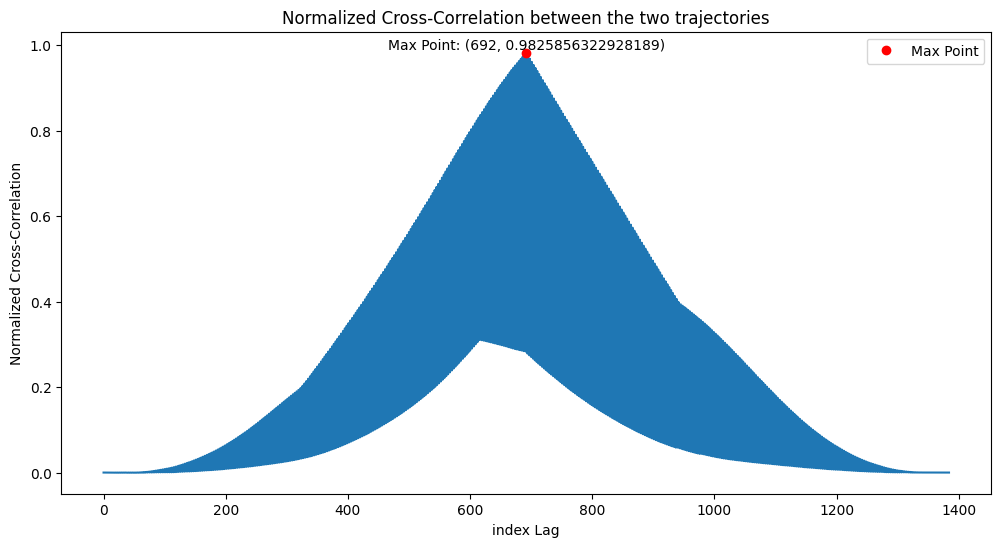

In [67]:
plot_normalised_crossed_cor(normalised_crossed_corel)